## Student Information

### Name      : Ravi Sumanth Palakodeti
### Student ID: 8959568
### Course    : CSCN8010-25W-Sec1-Foundations of Machine Learning Frameworks
### Section   : 1


## Assignment


## 1  The goal of the project is to train a univariate linear regression model. 


##### The linear regression is performed between 
##### 1. Median house value (dependent variable) and median income (independent variable)
##### 2. Median house value (dependent variable) and population (independent variable)
##### 3. Median house value (dependent variable) and number of households (independent variable)

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.3f' % x)  # used to display MSE, MAE values upto only 3 decimals

### 2 Obtaining the Data



#### Source: Downloaded from [Kaggle California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

#### import kagglehub library.

#### use dataset_download function to download the dataset

#### save it in a path variable after appending \housing.csv text


In [158]:
import kagglehub

path=''

if(path == ''):
    path = kagglehub.dataset_download("camnugent/california-housing-prices")
path = path + '\housing.csv'
print("Path to dataset files:", path)



Path to dataset files: C:\Users\RAVI\.cache\kagglehub\datasets\camnugent\california-housing-prices\versions\1\housing.csv


Data Dictionary:
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea




#### pandas's read_csv is used to load the data into the dataframe

In [159]:
housing = pd.read_csv(path)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


dataframe's head() and tail() functions prints the first and last 5 records respectively

In [160]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


the shape of the dataframe rows and columns of the dataframe can be obtained using shape

In [161]:
print(f'The number of rows is {housing.shape[0]}. The number of columns is {housing.shape[1]}')

The number of rows is 20640. The number of columns is 10


info() function returns the information on the dataset including columns, number of non-null records, and datatypes.

In [162]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


From the above information, we can find that in total 8 columns are numerical and ocean_proximity is an object datatype.

There are some missing values from total_bedrooms. 20640 total number of rows. only 20433 rows have values for total_bedrooms.

## 3 Exploratory Data Analysis (EDA)

 An approach to analyzing data sets to summarize their main characteristics, often with visual methods.

#### Describe function returns the five number summary information of the data set

In [163]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


Statistical Summary:

1. Median_house_value ( in USD): The mean of the median_house_value( in USD) is 206855.81. The min value is 14999. Around 50% of houses have medain_house_value less than or equal to 179700. The range is around 485002. The max value is 5000001. We will check the boxplots for outliers and process the outliers accordingly.

2. Median_income( in tens of thousands of USD): the mean of the median_income ( in tens of thousands of USD) is  3.87. The min value is 0.49 and the max is 15.0. The range is approximately 14.5. 75% of the values of the median_income are less than 4.74 where are the maximum is 15.0. We will check the boxplots for outliers and process the outliers accordingly..

3. households (living with in a home unit, for a block): The mean value of households is 499.5. Min is 1 and the max is 6082, while 75% of the data has less than or equal to 4.74 households. The range is approximately 6081.  We will check the boxplots for outliers and process the outliers accordingly.

4. Population( total number of people residing in the block): The mean is around 1425. The min is 3 and the maximum is 35682 with the range of 35679. 75% of the values are less than 1725. We will check the boxplots for outliers and process the outliers accordingly.

##### The histogram and boxplot of median house value

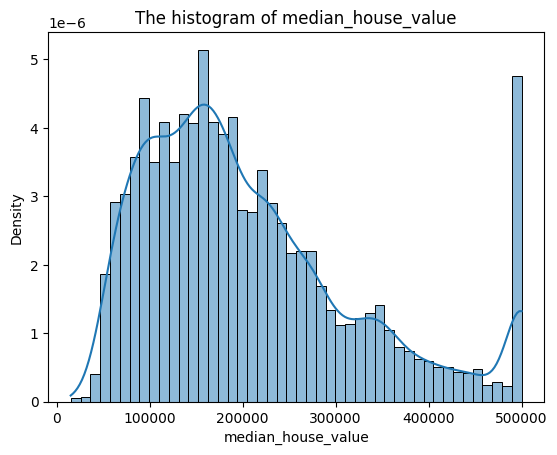

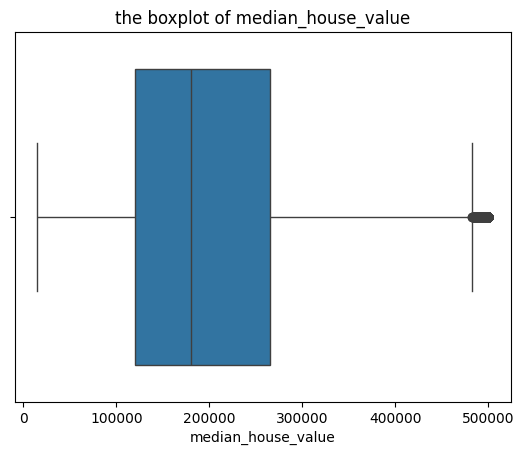

In [164]:
plt.title("The histogram of median_house_value")
sns.histplot(data=housing, x='median_house_value',stat='density',kde=True);
plt.show();
plt.title("the boxplot of median_house_value")
sns.boxplot(data=housing,x='median_house_value');
plt.show();

From the above, we can clearly observe that there are outliers for median_house_value of grater than 500000 and the histogram suggest that the distribution of data is multimodal.

##### The histogram and boxplot of median_income

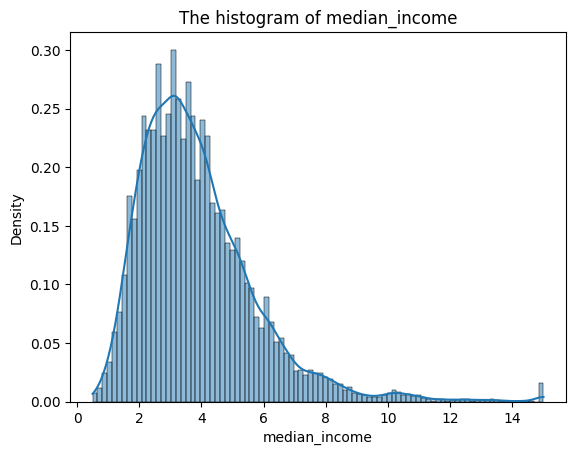

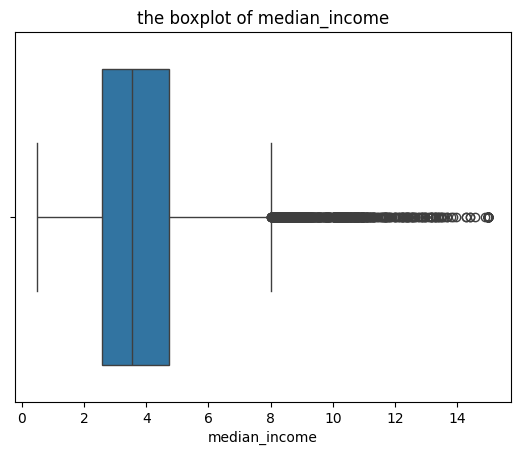

In [165]:
plt.title("The histogram of median_income")
sns.histplot(data=housing, x='median_income',stat='density',kde=True);
plt.show();
plt.title("the boxplot of median_income")
sns.boxplot(data=housing,x='median_income');
plt.show();

From the above boxplot, we can see that there are several outliers of median_income over 80000 USD.
The histogram shows that the data is right-skewed and the distribution is not normal. ( further check about the normality of the data can be verified using Q-Q plot(probplot) or Shapiro's test.)

##### The histogram and boxplot of population

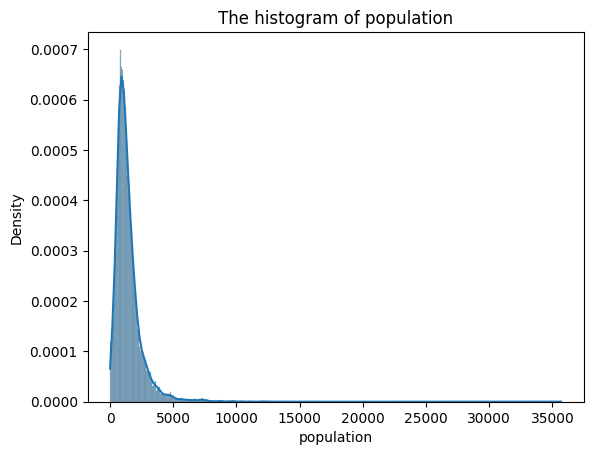

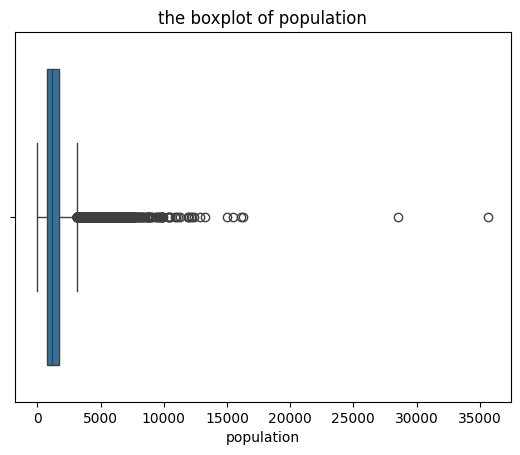

In [166]:
plt.title("The histogram of population")
sns.histplot(data=housing, x='population',stat='density',kde=True);
plt.show();
plt.title("the boxplot of population")
sns.boxplot(data=housing,x='population');
plt.show();

The above boxplot clearly shows that there are outliers in the population data starting with 5000 and reaching 35000.
The histogram shows that the data is right-skewed and the distribution is not normal. ( further check about the normality of the data can be verified using Q-Q plot(probplot) or Shapiro's test.)

##### The histogram and boxplot of households

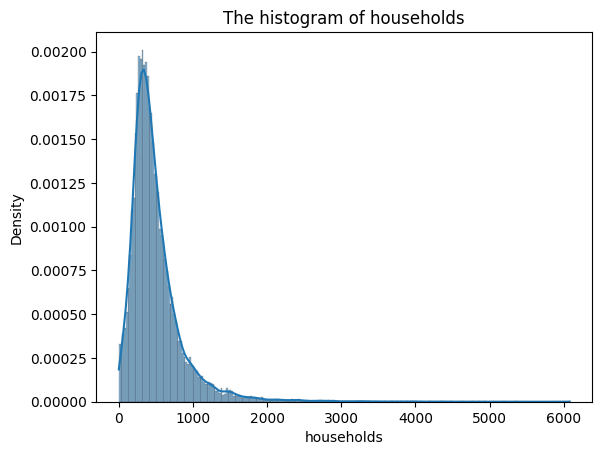

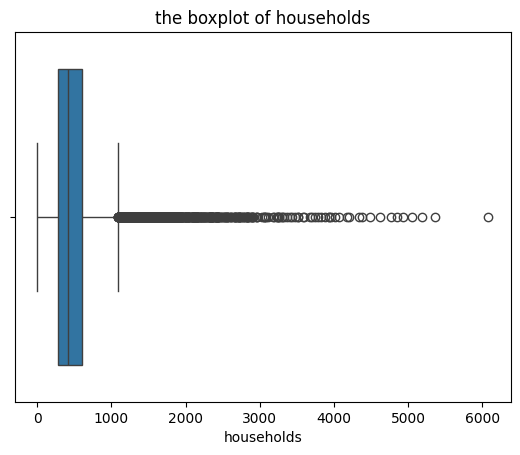

In [167]:
plt.title("The histogram of households")
sns.histplot(data=housing, x='households',stat='density', kde=True);
plt.show();
plt.title("the boxplot of households")
sns.boxplot(data=housing,x='households');
plt.show();

The above boxplot clearly shows that there are outliers in the households data starting with 1000 and reaching 60000. there is only one value of 6000. 
The histogram shows that the data is right-skewed and the distribution is not normal. ( further check about the normality of the data can be verified using Q-Q plot(probplot) or Shapiro's test.)

#### Scatterplot between median_income and the median_house_value

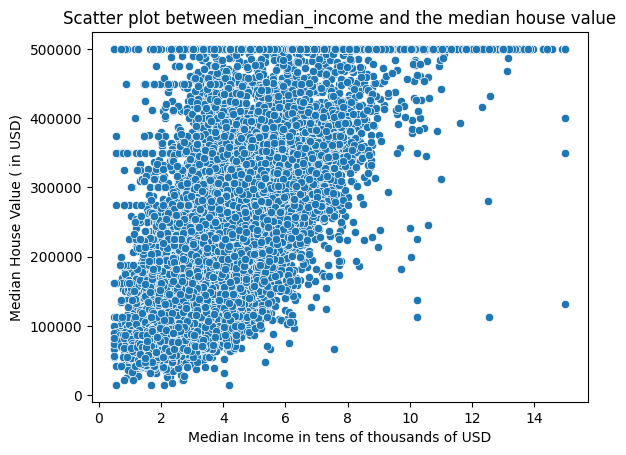

In [168]:
plt.title("Scatter plot between median_income and the median house value")
sns.scatterplot(x="median_income", y="median_house_value", data=housing);
plt.xlabel("Median Income in tens of thousands of USD")
plt.ylabel("Median House Value ( in USD)")
plt.show()


The scatterplot between median income and the median house value is seen above. 

As we can see, there is a positive correlation between median income and the median house value. i.e., higher the median income the greater is the median house value. 

Linear regression can be performed in this data and the best fit line could be identified. Predictions using linear regression model could be accurate because of the positive correlation between the median income and the median house value fields.

#### Scatterplot between population and the median_house_value

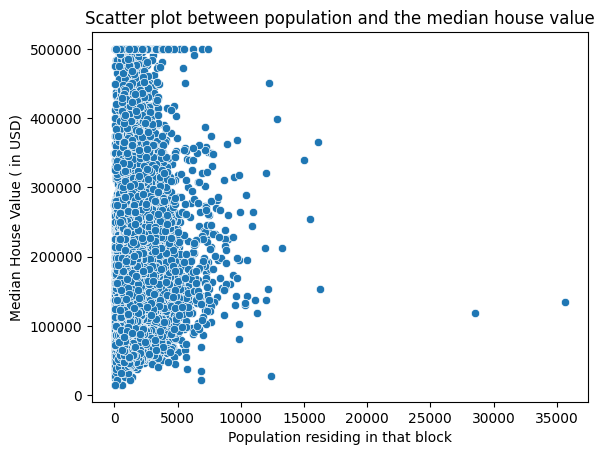

In [169]:
plt.title("Scatter plot between population and the median house value")
sns.scatterplot(x="population", y="median_house_value", data=housing);
plt.xlabel("Population residing in that block")
plt.ylabel("Median House Value ( in USD)")
plt.show()


The scatter plot between population and the median house value is shown above. 

From the above plot, we can observe that there is no correlation between population and the median house value. Therefore predicting the median house values for population using linear regression model will not yield accurate predictions.

#### Scatterplot between number of households and the median_house_value

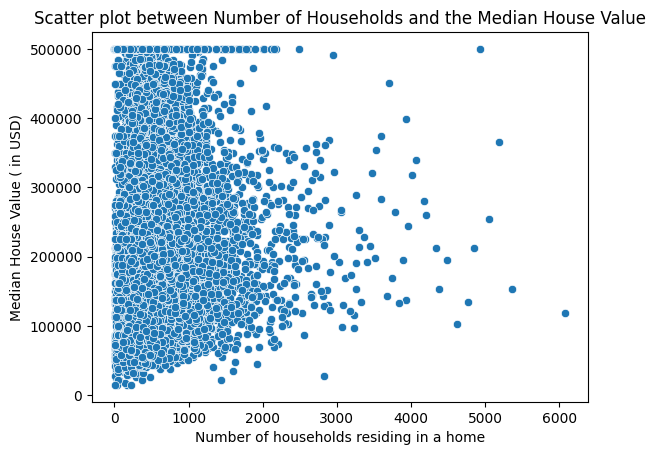

In [170]:
plt.title("Scatter plot between Number of Households and the Median House Value")
sns.scatterplot(x="households", y="median_house_value", data=housing);
plt.xlabel("Number of households residing in a home")
plt.ylabel("Median House Value ( in USD)")
plt.show()

The scatter plot between the number of households and the median house value is shown above. 

From the above plot, we can observe that there is no correlation between the number of households and the median house value. Therefore predicting the median house values for number of households using linear regression model will not yield accurate predictions.

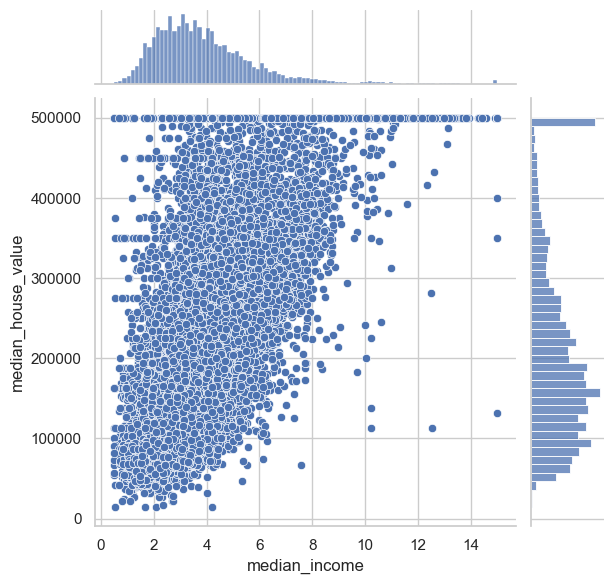

In [171]:
# using seaborn scatter plot, plot the median_house_value vs median_income

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="median_income", y="median_house_value", data=housing)


### Data Preprocessing

Filter out records with median_house_value = 500001 since it seems to be a cap for the median_house_value.

In [172]:
housing_preprocessed = housing[housing.median_house_value != 500001]

In [173]:
print(f"After filtering, there are {len(housing_preprocessed)} records, versus {len(housing)} before filtering")

After filtering, there are 19675 records, versus 20640 before filtering


Let's plot the same jointplot one more time to visualize the difference.

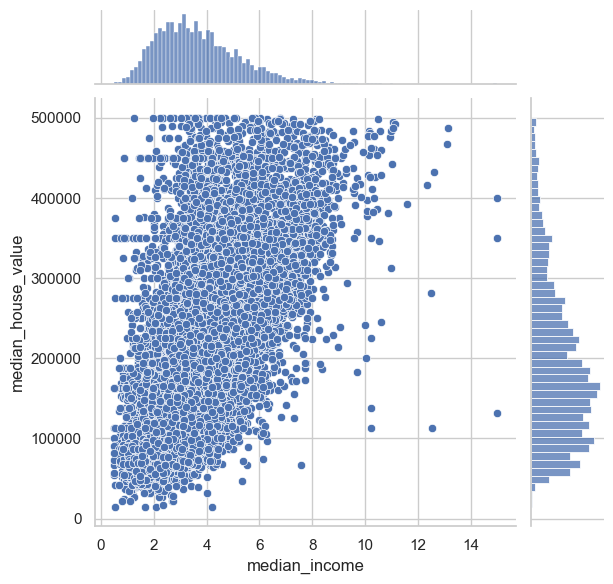

In [174]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="median_income", y="median_house_value", data=housing_preprocessed)

## Train and Test Split

Split the data into training/testing sets. 
Use the first 80% of the data for training.

In [175]:
train_size = int(len(housing_preprocessed) * 0.8)
train = housing_preprocessed[:train_size]
test = housing_preprocessed[train_size:]

Scatter plot, train in blue and test in red in the same plot


<Axes: xlabel='median_income', ylabel='median_house_value'>

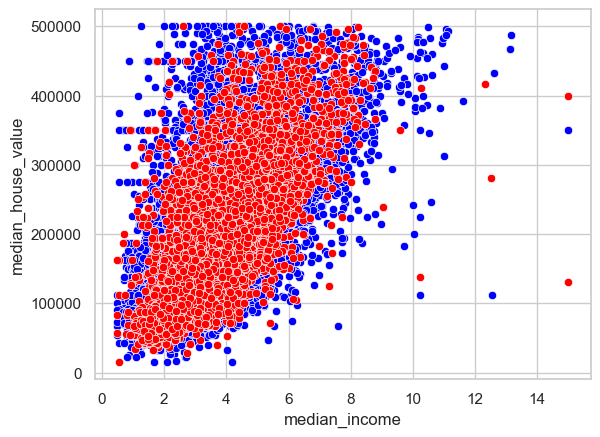

In [176]:
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red")

## 4 MODELS

### 1. Model between med_income and median_house_Value

#### Define a Model

Create a linear regression object

In [177]:
model_medIncome = linear_model.LinearRegression()

#### Train the Model

In [178]:
# fit
model_medIncome.fit(X=train[["median_income"]], y=train[["median_house_value"]])

LinearRegression()

#### Evaluate the Model

For the Train and Test data:

* Print the slope and intercept
* Plot the regression line on top of the scatter plot of the training data
* Print the Mean Squared Error (MSE) and the Mean Absolute Error (MAE)

In [179]:
# print coefficients
print(f"Intercept: {model_medIncome.intercept_}")
print(f"Coefficients: {model_medIncome.coef_}")

Intercept: [48204.53436817]
Coefficients: [[38702.97233842]]


In [180]:
12*model_medIncome.coef_ + model_medIncome.intercept_

array([[512640.20242926]])

In [181]:
model_medIncome.predict(X=[[12],[1],[100]])

array([[ 512640.20242926],
       [  86907.50670659],
       [3918501.76821055]])

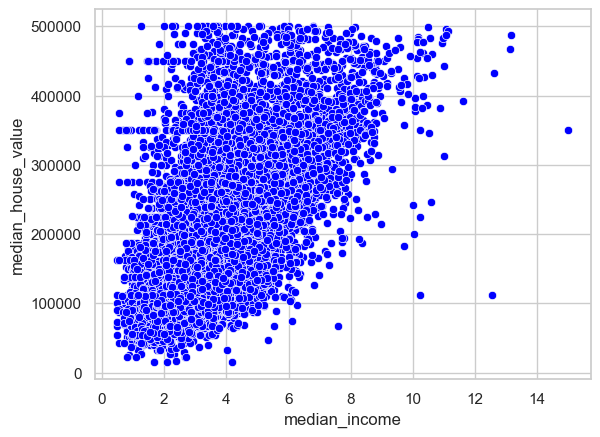

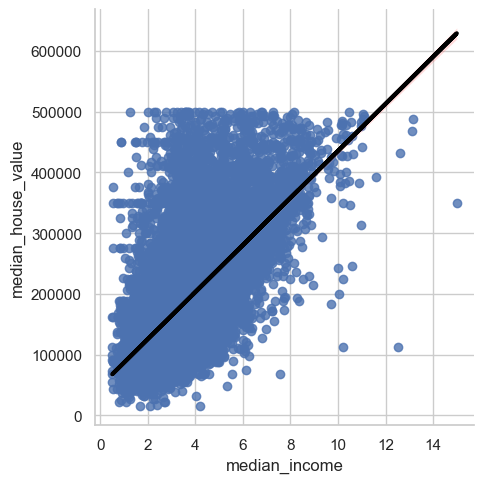

In [182]:
# plot the regression line against the training data
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue")
sns.lmplot(x="median_income", y="median_house_value", data=train,line_kws={'color': 'red', 'linewidth': 2});
plt.plot(train[["median_income"]], model_medIncome.predict(train[["median_income"]]), color="black", linewidth=3)
plt.show()


In [183]:
# print the MSE and MAE on the train set
print("Train set")
print(f"Mean squared error: {mean_squared_error(train[['median_house_value']], model_medIncome.predict(train[['median_income']]))}")
print(f"Mean absolute error: {mean_absolute_error(train[['median_house_value']], model_medIncome.predict(train[['median_income']]))}")

Train set
Mean squared error: 5557954319.259176
Mean absolute error: 55839.99864072871


In [184]:
# print the MSE and MAE on the test set
print("Test set")
print(f"Mean squared error: {mean_squared_error(test[['median_house_value']], model_medIncome.predict(test[['median_income']]))}")
print(f"Mean absolute error: {mean_absolute_error(test[['median_house_value']], model_medIncome.predict(test[['median_income']]))}")


Test set
Mean squared error: 5831038297.419372
Mean absolute error: 59961.60099129183


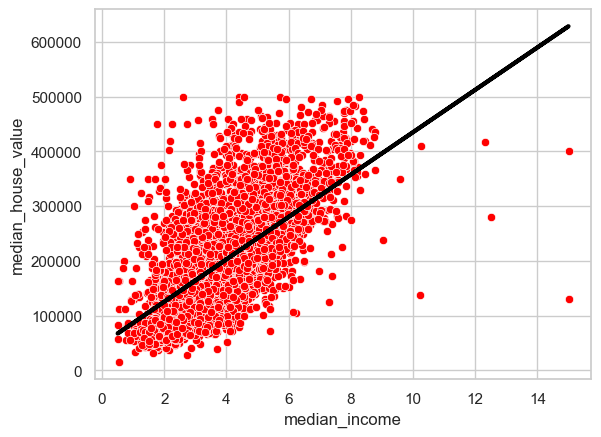

In [185]:
# plot the regression line against the test data
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red")
plt.plot(test[["median_income"]], model_medIncome.predict(test[["median_income"]]), color="black", linewidth=3);

### 2. Model between population and median_house_value

#### Define a Model

Create a linear regression object

In [186]:
model_population = linear_model.LinearRegression()

#### Train the model

In [187]:
model_population.fit(X=train[["population"]], y=train[["median_house_value"]])

LinearRegression()

#### Evaluate the Model

For the Train and Test data:

* Print the slope and intercept
* Plot the regression line on top of the scatter plot of the training data
* Print the Mean Squared Error (MSE) and the Mean Absolute Error (MAE)

In [188]:
print(f"Intercept: {model_population.intercept_}")
print(f"Coefficients: {model_population.coef_}")

Intercept: [188081.58862584]
Coefficients: [[0.32862973]]


In [189]:
12*model_population.coef_ + model_population.intercept_

array([[188085.53218256]])

In [190]:
model_population.predict(X=[[12],[1],[100]])

array([[188085.53218256],
       [188081.91725556],
       [188114.45159855]])

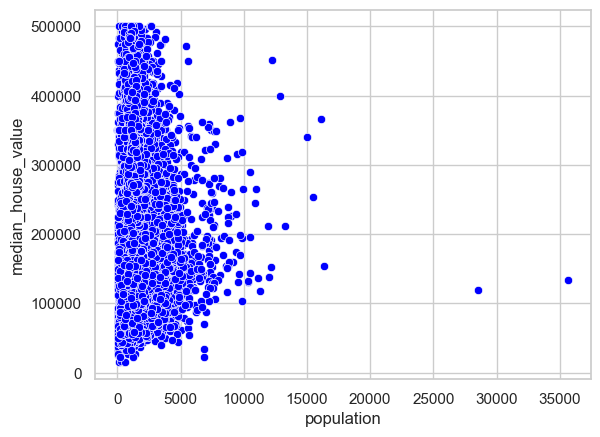

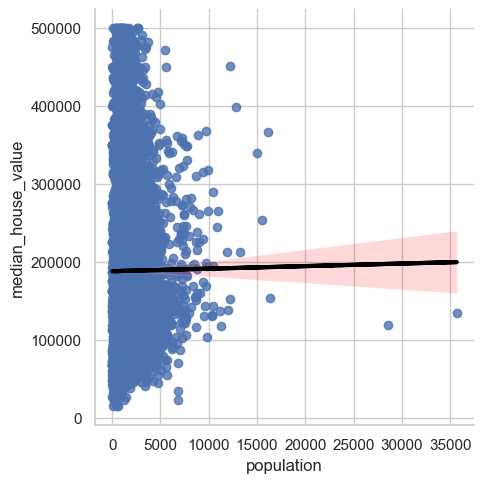

In [191]:
# plot the regression line against the training data
sns.scatterplot(x="population", y="median_house_value", data=train, color="blue")
sns.lmplot(x="population", y="median_house_value", data=train,line_kws={'color': 'red', 'linewidth': 2});
plt.plot(train[["population"]], model_population.predict(train[["population"]]), color="black", linewidth=3)
plt.show()


In [192]:
# print the MSE and MAE on the train set
print("Train set")
print(f"Mean squared error: {mean_squared_error(train[['median_house_value']], model_population.predict(train[['population']]))}")
print(f"Mean absolute error: {mean_absolute_error(train[['median_house_value']], model_population.predict(train[['population']]))}")


Train set
Mean squared error: 9236185598.969007
Mean absolute error: 75879.52660618868


In [193]:
# print the MSE and MAE on the test set
print("Test set")
print(f"Mean squared error: {mean_squared_error(test[['median_house_value']], model_population.predict(test[['population']]))}")
print(f"Mean absolute error: {mean_absolute_error(test[['median_house_value']], model_population.predict(test[['population']]))}")

Test set
Mean squared error: 10863782849.78328
Mean absolute error: 85178.9089807831


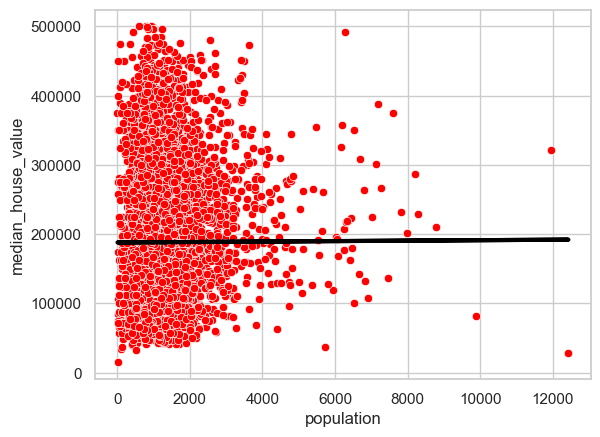

In [194]:
# plot the regression line against the test data
sns.scatterplot(x="population", y="median_house_value", data=test, color="red")
plt.plot(test[["population"]], model_population.predict(test[["population"]]), color="black", linewidth=3);

### 3. Model between number of households and median_house_Value

#### Define a Model

Create a linear regression object

In [195]:
model_households = linear_model.LinearRegression()

#### Train the Model

In [196]:
model_households.fit(X=train[["households"]], y=train[["median_house_value"]])

LinearRegression()

#### Evaluate the Model

For the Train and Test data:

* Print the slope and intercept
* Plot the regression line on top of the scatter plot of the training data
* Print the Mean Squared Error (MSE) and the Mean Absolute Error (MAE)

In [197]:
print(f"Intercept: {model_households.intercept_}")
print(f"Coefficients: {model_households.coef_}")

Intercept: [177147.28853835]
Coefficients: [[22.62572591]]


In [198]:
12*model_households.coef_ + model_households.intercept_

array([[177418.79724925]])

In [199]:
model_households.predict(X=[[12],[1],[100]])

array([[177418.79724925],
       [177169.91426426],
       [179409.86112921]])

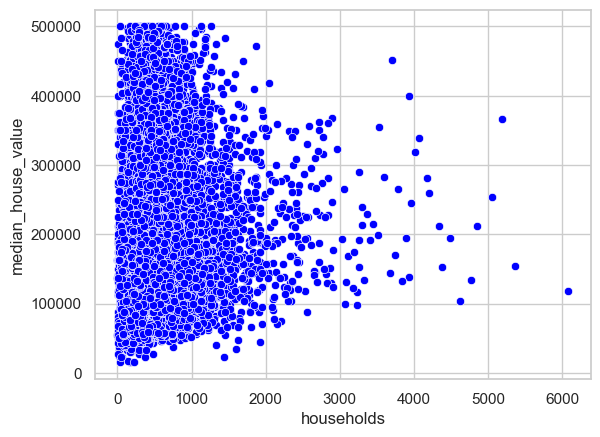

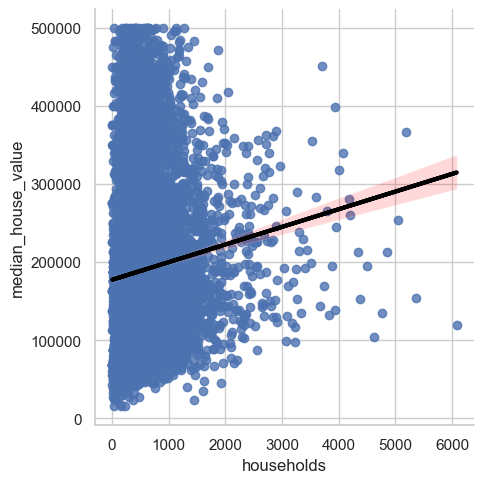

In [200]:
# plot the regression line against the training data
sns.scatterplot(x="households", y="median_house_value", data=train, color="blue")
sns.lmplot(x="households", y="median_house_value", data=train,line_kws={'color': 'red', 'linewidth': 2});
plt.plot(train[["households"]], model_households.predict(train[["households"]]), color="black", linewidth=3)
plt.show()


In [201]:
# print the MSE and MAE on the train set
print("Train set")
print(f"Mean squared error: {mean_squared_error(train[['median_house_value']], model_households.predict(train[['households']]))}")
print(f"Mean absolute error: {mean_absolute_error(train[['median_house_value']], model_households.predict(train[['households']]))}")

Train set
Mean squared error: 9156895298.287685
Mean absolute error: 75463.10651473372


In [202]:
# print the MSE and MAE on the test set
print("Test set")
print(f"Mean squared error: {mean_squared_error(test[['median_house_value']], model_households.predict(test[['households']]))}")
print(f"Mean absolute error: {mean_absolute_error(test[['median_house_value']], model_households.predict(test[['households']]))}")


Test set
Mean squared error: 10759278800.526697
Mean absolute error: 84503.1472350856


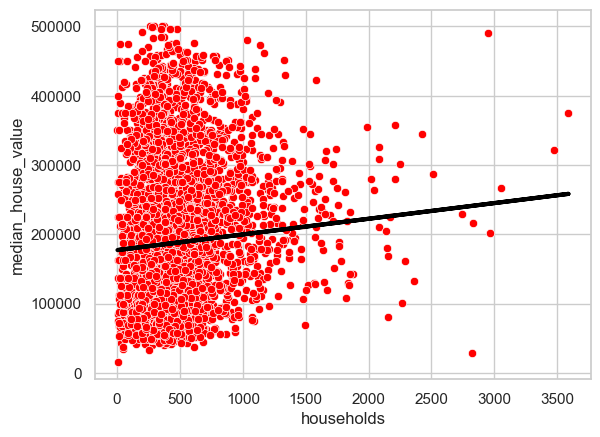

In [203]:
# plot the regression line against the test data
sns.scatterplot(x="households", y="median_house_value", data=test, color="red")
plt.plot(test[["households"]], model_households.predict(test[["households"]]), color="black", linewidth=3)

## 5 Tabular Summary of the performance metrics of all the three models

In [207]:

Models_data = {
    'Model': ['Model_Medincome', 'Model_Population', 'Model_Households'],
    'Coefficient': [model_medIncome.coef_[0][0], model_population.coef_[0][0], model_households.coef_[0][0]],
    'Intercept': [model_medIncome.intercept_[0], model_population.intercept_[0], model_households.intercept_[0]],
    'MSE Train' :      [mean_squared_error(train[['median_house_value']], model_medIncome.predict(train[['median_income']])),mean_squared_error(train[['median_house_value']], model_population.predict(train[['population']])),mean_squared_error(train[['median_house_value']], model_households.predict(train[['households']]))],
    'MSE Test' :      [mean_squared_error(test[['median_house_value']], model_medIncome.predict(test[['median_income']])),mean_squared_error(test[['median_house_value']], model_population.predict(test[['population']])),mean_squared_error(test[['median_house_value']], model_households.predict(test[['households']]))],
    'MAE Train' :      [mean_absolute_error(train[['median_house_value']], model_medIncome.predict(train[['median_income']])),mean_absolute_error(train[['median_house_value']], model_population.predict(train[['population']])),mean_absolute_error(train[['median_house_value']], model_households.predict(train[['households']]))],
    'MAE Test' :      [mean_absolute_error(test[['median_house_value']], model_medIncome.predict(test[['median_income']])),mean_absolute_error(test[['median_house_value']], model_population.predict(test[['population']])),mean_absolute_error(test[['median_house_value']], model_households.predict(test[['households']]))]
}

df = pd.DataFrame(Models_data)
df


,Model,Coefficient,Intercept,MSE Train,MSE Test,MAE Train,MAE Test
0,Model_Medincome,38702.972,48204.534,5557954319.259,5831038297.419,55839.999,59961.601
1,Model_Population,0.329,188081.589,9236185598.969,10863782849.783,75879.527,85178.909
2,Model_Households,22.626,177147.289,9156895298.288,10759278800.527,75463.107,84503.147


## 6 Plot all the scatter plots with metrics

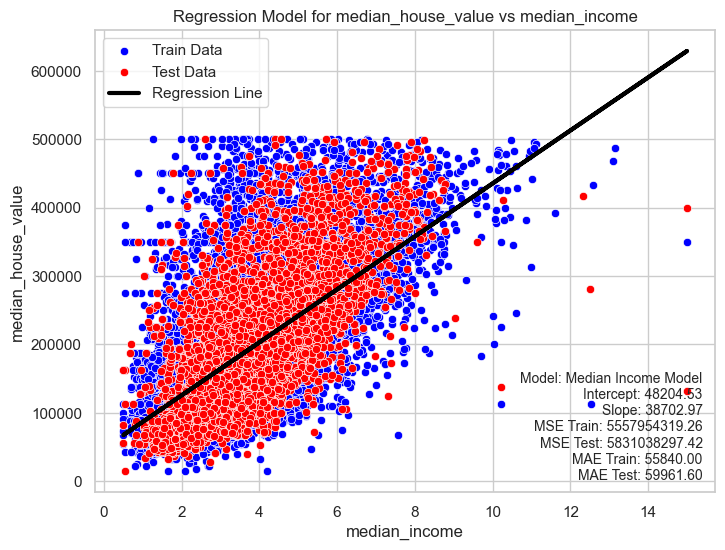

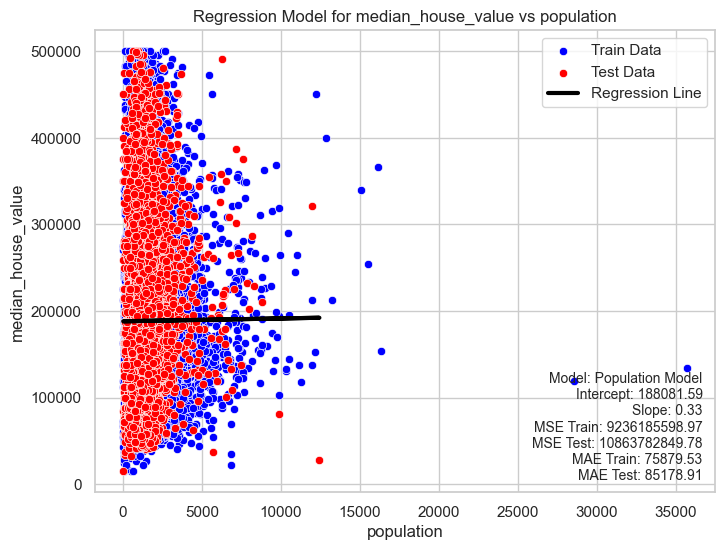

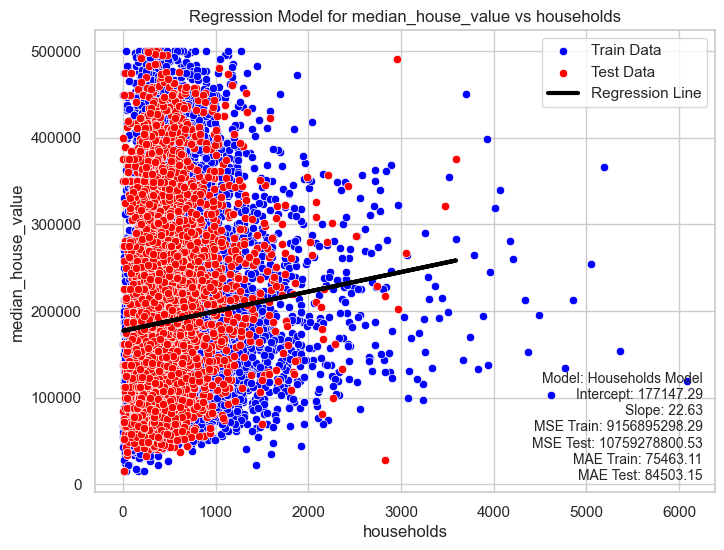

In [237]:
# create a function that plots the scatter plots of all the models
def modelplots(model, x_col, y_col, data_train, data_test, model_name):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_col, y=y_col, data=data_train, color="blue", label="Train Data")
    sns.scatterplot(x=x_col, y=y_col, data=data_test, color="red", label="Test Data")
    plt.plot(data_test[[x_col]], model.predict(data_test[[x_col]]), color="black", linewidth=3, label='Regression Line')
    
    # Calculate MSE and MAE for the current model
    mse_train = mean_squared_error(data_train[[y_col]], model.predict(data_train[[x_col]]))
    mae_train = mean_absolute_error(data_train[[y_col]], model.predict(data_train[[x_col]]))
    mse_test = mean_squared_error(data_test[[y_col]], model.predict(data_test[[x_col]]))
    mae_test = mean_absolute_error(data_test[[y_col]], model.predict(data_test[[x_col]]))
    
    # Text box with values 
    plt.text(.98, 0.02, f"Model: {model_name}\n"
             f"Intercept: {model.intercept_[0]:.2f}\n"
             f"Slope: {model.coef_[0][0]:.2f}\n"
             f"MSE Train: {mse_train:.2f}\n"
             f"MSE Test: {mse_test:.2f}\n"
             f"MAE Train: {mae_train:.2f}\n"
             f"MAE Test: {mae_test:.2f}", 
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment= 'right')

    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"Regression Model for {y_col} vs {x_col}")
    plt.legend()
    plt.show()


modelplots(model_medIncome, "median_income", "median_house_value", train, test, "Median Income Model")
modelplots(model_population, "population", "median_house_value", train, test, "Population Model")
modelplots(model_households, "households", "median_house_value", train, test, "Households Model")


## 7. Summary

In [238]:
df

,Model,Coefficient,Intercept,MSE Train,MSE Test,MAE Train,MAE Test
0,Model_Medincome,38702.972,48204.534,5557954319.259,5831038297.419,55839.999,59961.601
1,Model_Population,0.329,188081.589,9236185598.969,10863782849.783,75879.527,85178.909
2,Model_Households,22.626,177147.289,9156895298.288,10759278800.527,75463.107,84503.147


The best model, i.e., the best fit line , is the model that has low MSE and Low MAE metrics
LOW MSE means that the model fits better
low MAE ensures for better accuracy of predictions.

From the above dataframe, we can observe that
1. MSE for model_medincome are low compared to the other models. 
2. MSE train and MSE test for Model_Medincome are not too different. same can be said for MAE train and MAE test. This means that the model is not overfitting.
3. The other models have signigicantly higher MSE and MAE values indicating that the errors are guge.

So in this scenario Model_Medincome is the best model.